# Example Extinction Calculations

Show example of using `extinction` package to
1. Calculate extinction as a function of $\lambda$ for a given $R_V$, $E(B-V)$, and extinction law
2. Calculate color excess relationship for a given extinction law.  Specifically,  
  1. How to convert $E(g-r)$ to $E(B-V)$
  2. How to convert $E(g-r)$ to $A_V$

In [1]:
import extinction

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import astropy.constants as const

In [2]:
%matplotlib inline

Let's create a spectrum over some set of optical wavelengths

In [3]:
wavelength = np.linspace(3000, 10000, 701) * u.angstrom
frequency = const.c / wavelength
frequency = frequency.to(u.Hz)
# Constant AB erg/s/cm^2/Hz
norm = 1000 * u.erg / u.s / u.cm ** 2
flux_density_frequency = norm / frequency
flux_density_wavelength = flux_density_frequency * const.c / wavelength ** 2
flux_density_wavelength = flux_density_wavelength.to(
    u.erg / u.s / u.cm ** 2 / u.angstrom
)

Plot the spectral flux densities vs. wavelength and vs. frequency

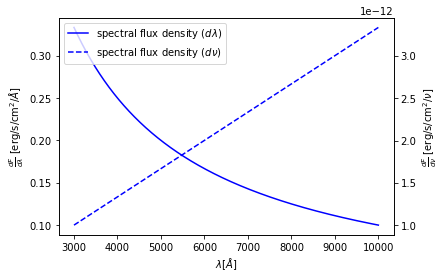

In [4]:
ax1 = plt.gca()
ax1.plot(
    wavelength,
    flux_density_wavelength,
    color="blue",
    ls="-",
    label="spectral flux density ($d\lambda$)",
)
ax1.set_xlabel(r"$\lambda [\AA]$")
ax1.set_ylabel(r"$\frac{dF}{d\lambda}$ [erg/s/cm$^2$/$\AA$]")
ax2 = ax1.twinx()
ax2.plot(
    wavelength,
    flux_density_frequency,
    color="blue",
    ls="--",
    label=r"spectral flux density ($d\nu$)",
)
ax2.set_xlabel(r"$\nu$ [Hz]$")
ax2.set_ylabel(r"$\frac{dF}{d\nu}$ [erg/s/cm$^2$/$\nu$]")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2);

------

## 1. Calculating Extinction

We can use the `extinction` package to calculate a sample wavelength-dependent extinction.

```
pip install extinction
```

We need to choose a dust extinction law.  This is what translates a given color excess to the extinction per wavelength.  The dust law takes $A_V$ as input, with $R_V$ as optional.

We here choose a Fitzpatrick99 dust extinction law.

In [5]:
help(extinction.fitzpatrick99)

Help on built-in function fitzpatrick99 in module extinction:

fitzpatrick99(...)
    fitzpatrick99(wave, a_v, r_v=3.1, unit='aa')
    
    Fitzpatrick (1999) dust extinction function.
    
    Fitzpatrick (1999) [1]_ model which relies on the parametrization
    of Fitzpatrick & Massa (1990) [2]_ in the UV (below 2700 A) and
    spline fitting in the optical and IR. This function is defined
    from 910 A to 6 microns, but note the claimed validity goes down
    only to 1150 A. The optical spline points are not taken from F99
    Table 4, but rather updated versions from E. Fitzpatrick (this
    matches the Goddard IDL astrolib routine FM_UNRED).
    
    
    Parameters
    ----------
    wave : numpy.ndarray (1-d)
        Input wavelengths or wavenumbers (see units).
    a_v : float
        Total V-band extinction in magnitudes.
    r_v : float
        Ratio of total to selective extinction, A_V / E(B-V).
    unit : {'aa', 'invum'}, optional
        Wavelength units: Angstroms or in

In [6]:
rv = 3.1
e_bv = 0.2
av = rv * e_bv

mag_ext = extinction.fitzpatrick99(wavelength.to(u.angstrom), av, rv)
extincted_flux_density_wavelength = flux_density_wavelength * 10 ** (-0.4 * mag_ext)

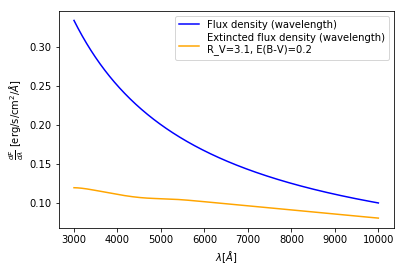

In [7]:
ax1 = plt.gca()

ax1.plot(
    wavelength, flux_density_wavelength, color="blue", label="Flux density (wavelength)"
)
ax1.plot(
    wavelength,
    extincted_flux_density_wavelength,
    color="orange",
    label="Extincted flux density (wavelength)\nR_V=3.1, E(B-V)=0.2",
)
ax1.set_xlabel(r"$\lambda [\AA]$")
ax1.set_ylabel(r"$\frac{dF}{d\lambda}$ [erg/s/cm$^2$/$\AA$]")
ax1.legend();

------

## 2. Translating color excess to $A_V$

$A_V = R_V \times E(B-V)$
are the standard reference bands for extinction calculations.  This is an arbitrary choice.  We can compute the relationship between the excess in other colors and the extinction in a given band.

We will first need some filters to define our bandpasses.  We will use the data associated with the `stsynphot` package as one convenient way of grabbing some standard filters.  We're not actually using the `stsynphot` package itself because it's a little awkward to use to do something as simple as we're doing here.

There's a bit more work to grab the actual data files.  We only need `synphot1.tar.gz`, which has the filters.

ftp://archive.stsci.edu/pub/hst/pysynphot/synphot1.tar.gz

In [8]:
! curl -O ftp://archive.stsci.edu/pub/hst/pysynphot/synphot1.tar.gz
! tar xvzf synphot1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.0M  100 90.0M    0     0  16.3M      0  0:00:05  0:00:05 --:--:-- 18.5MM      0  0:00:05  0:00:04  0:00:01 15.6M
x grp/hst/cdbs/mtab/3241637sm_tmt.fits
x grp/hst/cdbs/mtab/41g1452dm_tmc.fits
x grp/hst/cdbs/mtab/41g16069m_tmg.fits
x grp/hst/cdbs/comp/acs/acs_block1_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_block2_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_block3_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_block4_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking1_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking2_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking3_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking4_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_cor_aper_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_cor_aper_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_f115lp_001.tab
x grp/hst/cdbs/comp/acs/acs_f115lp_002.tab
x grp/hst/cdbs/comp/acs

x grp/hst/cdbs/comp/acs/acs_f502n_wfc_007_syn.fits
x grp/hst/cdbs/comp/acs/acs_f502n_wfc_008_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_001.tab
x grp/hst/cdbs/comp/acs/acs_f550m_002.fits
x grp/hst/cdbs/comp/acs/acs_f550m_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_hrc_007_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_hrc_008_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_wfc_007_syn.fits
x grp/hst/cdbs/comp/acs/acs_f550m_wfc_008_syn.fits
x grp/hst/cdbs/comp/acs/acs_f555w_001.tab
x grp/hst/cdbs/comp/acs/acs_f555w_002.fits
x grp/hst/cdbs/comp/acs/acs_f555w_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_f555w_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_f555w_hrc_001.tab
x grp/hst/cdbs/comp/acs/acs_f555w_hrc_002.fits
x grp/hst/cdbs/comp/acs/acs_f555w_hrc_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_f555w_hrc_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_f555w_hrc_005_syn.f

x grp/hst/cdbs/comp/acs/acs_fr853n_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr853n_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr853n_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr914m_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr914m_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr914m_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr914m_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr914m_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr914m_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr931n_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr931n_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr931n_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr931n_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr931n_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_fr931n_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_g800l_001.tab
x grp/hst/cdbs/comp/acs/acs_g800l_002.fits
x grp/hst/cdbs/comp/acs/acs_g800l_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_g800l_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_g800l_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_g800l_hrc_001.fits
x grp/h

x grp/hst/cdbs/comp/acs/acs_wfc_ccd2_mjd_020_syn.fits
x grp/hst/cdbs/comp/acs/acs_wfc_ccd2_mjd_021_syn.fits
x grp/hst/cdbs/comp/acs/acs_wfc_ccd2_mjd_022_syn.fits
x grp/hst/cdbs/comp/acs/acs_wfc_ccd2_mjd_023_syn.fits
x grp/hst/cdbs/comp/acs/acs_wfc_ccd2_mjd_024_syn.fits
x grp/hst/cdbs/comp/acs/acs_wfc_ebe_win12f_001.tab
x grp/hst/cdbs/comp/acs/acs_wfc_ebe_win12f_002.tab
x grp/hst/cdbs/comp/acs/acs_wfc_ebe_win12f_003.tab
x grp/hst/cdbs/comp/acs/acs_wfc_ebe_win12f_004.fits
x grp/hst/cdbs/comp/acs/acs_wfc_ebe_win12f_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_wfc_im123_001.tab
x grp/hst/cdbs/comp/acs/acs_wfc_im123_002.tab
x grp/hst/cdbs/comp/acs/acs_wfc_im123_003.fits
x grp/hst/cdbs/comp/acs/acs_wfc_im123_004_syn.fits
x grp/hst/cdbs/comp/acs/save/
x grp/hst/cdbs/comp/acs/save/acs_hrc_ccd_mjd_015_syn.fits
x grp/hst/cdbs/comp/acs/save/acs_wfc_ccd1_mjd_021_syn.fits
x grp/hst/cdbs/comp/acs/save/acs_wfc_ccd2_mjd_021_syn.fits
x grp/hst/cdbs/comp/cos/cos_boa_001_syn.fits
x grp/hst/cdbs/comp/cos/cos_

x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_010_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_011_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_012_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_013_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_014_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_015_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_016_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_017_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_013_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_014_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_015_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_016_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1318_mjd_017_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1327_001_syn.fits
x grp/hst/cdbs/comp/

x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_013_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_014_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_015_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_016_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1600_mjd_017_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_001_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_002_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_003_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_004_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_005_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_006_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_008_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_010_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g160mc1611_011_syn.fits
x grp/hst/cdbs/comp/

x grp/hst/cdbs/comp/cos/cosncm3_g185mc1786_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1817_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1835_001_syn.fits
x grp/hst/cdbs/comp/cos/

x grp/hst/cdbs/comp/cos/cosncm3_g185mc1953_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1953_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1971_mjd_012_syn.fits
x grp/hst/cdbs/comp/

x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2339_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2357_001_syn.fits
x grp/hst/cdbs/comp/cos/

x grp/hst/cdbs/comp/cos/cosncm3_g285mc2617_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2617_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_007_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2637_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/

x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_007_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2996_012_syn.fits
x grp/hst/cdbs/comp/cos/cosn

x grp/hst/cdbs/comp/nicmos/nic1_f113n_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic1_f113n_003.tab
x grp/hst/cdbs/comp/nicmos/nic1_f113n_004.tab
x grp/hst/cdbs/comp/nicmos/nic1_f113n_005.fits
x grp/hst/cdbs/comp/nicmos/nic1_f113n_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f113n_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f113n_011_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f113n_012_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f113n_013_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_001.tab
x grp/hst/cdbs/comp/nicmos/nic1_f140w_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_002.tab
x grp/hst/cdbs/comp/nicmos/nic1_f140w_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_003.tab
x grp/hst/cdbs/comp/nicmos/nic1_f140w_004.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_005_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_011_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_012_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f140w_013_syn.fits
x grp/hst/cdbs/c

x grp/hst/cdbs/comp/nicmos/nic2_dqe_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_dqe_007_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_dqe_008_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_edge_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_f110w_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_f110w_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_003.tab
x grp/hst/cdbs/comp/nicmos/nic2_f110w_004.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_005_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_011_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_012_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_f110w_013_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_f160w_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_f160w_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_f160w_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_f160w_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_f160w_003.tab
x grp/hst/cdbs/comp/nicmos

x grp/hst/cdbs/comp/nicmos/nic2_para2_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_003.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_004.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_005_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol0l_007_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_003.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_004.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_005_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_007_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_001.tab
x grp/h

x grp/hst/cdbs/comp/nicmos/nic3_f215n_005_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f215n_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f215n_011_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f215n_012_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f215n_013_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_001.tab
x grp/hst/cdbs/comp/nicmos/nic3_f222m_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_002.tab
x grp/hst/cdbs/comp/nicmos/nic3_f222m_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_003.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_011_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_012_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f222m_013_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_f240m_001.tab
x grp/hst/cdbs/comp/nicmos/nic3_f240m_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic3_f240m_002.tab
x grp/hst/cdbs/comp/nicmos/nic3_f240m_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic3_f240m_003.tab
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_02x0063d_003.tab
x grp/hst/cdbs/comp/stis/stis_02x0063d_004.fits
x grp/hst/cdbs/comp/stis/stis_02x0063d_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_02x0063e_001.tab
x grp/hst/cdbs/comp/stis/stis_02x0063e_002.tab
x grp/hst/cdbs/comp/stis/stis_02x0063e_003.tab
x grp/hst/cdbs/comp/stis/stis_02x0063e_004.fits
x grp/hst/cdbs/comp/stis/stis_02x0063e_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_02x009_001.tab
x grp/hst/cdbs/comp/stis/stis_02x009_002.tab
x grp/hst/cdbs/comp/stis/stis_02x009_003.tab
x grp/hst/cdbs/comp/stis/stis_02x009_004.tab
x grp/hst/cdbs/comp/stis/stis_02x009_005.tab
x grp/hst/cdbs/comp/stis/stis_02x009_006.fits
x grp/hst/cdbs/comp/stis/stis_02x009_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_02x02_001.tab
x grp/hst/cdbs/comp/stis/stis_02x02_002.tab
x grp/hst/cdbs/comp/stis/stis_02x02_003.tab
x grp/hst/cdbs/comp/stis/stis_02x02_004.tab
x grp/hst/cdbs/comp/stis/stis_02x02_005.fits
x grp/hst/cdbs/comp/stis/stis_02x02_006_syn.fits
x grp/hst/cdbs/comp/s

x grp/hst/cdbs/comp/stis/stis_1p4_ech_022_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_022_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_023_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_023_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_023_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_024_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_024_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_024_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_025_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_025_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_025_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_026_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_026_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_026_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_027_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_027_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_027_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_028_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_028_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_1p4_ech_081_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_081_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_082_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_082_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_082_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_083_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_083_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_083_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_084_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_084_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_084_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_085_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_085_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_085_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_086_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_086_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_086_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_087_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_087_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_247mgii_001.tab
x grp/hst/cdbs/comp/stis/stis_247mgii_002.tab
x grp/hst/cdbs/comp/stis/stis_247mgii_003.tab
x grp/hst/cdbs/comp/stis/stis_247mgii_004.fits
x grp/hst/cdbs/comp/stis/stis_247mgii_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_247nd1_001.tab
x grp/hst/cdbs/comp/stis/stis_247nd1_002.tab
x grp/hst/cdbs/comp/stis/stis_247nd1_003.tab
x grp/hst/cdbs/comp/stis/stis_247nd1_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_247nd1_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_247nd1_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_247nd2_001.tab
x grp/hst/cdbs/comp/stis/stis_247nd2_002.tab
x grp/hst/cdbs/comp/stis/stis_247nd2_003.tab
x grp/hst/cdbs/comp/stis/stis_247nd2_004.fits
x grp/hst/cdbs/comp/stis/stis_247nd2_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_247nd2_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_247nd3_001.tab
x grp/hst/cdbs/comp/stis/stis_247nd3_002.tab
x grp/hst/cdbs/comp/stis/stis_247nd3_003.tab
x grp/hst/cdbs/comp/stis/stis_247nd3_004.fits
x grp/hst/cdbs/co

x grp/hst/cdbs/comp/stis/stis_2p3_ech_047_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_048_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_048_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_048_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_049_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_049_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_049_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_050_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_050_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_050_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_051_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_051_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_051_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_052_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_052_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_052_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_053_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_053_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_053_003_syn.fits
x grp/hst

x grp/hst/cdbs/comp/stis/stis_2p4_ech_081_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_081_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_082_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_082_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_082_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_083_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_083_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_083_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_084_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_084_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_084_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_085_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_085_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_085_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_086_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_086_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_086_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_087_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_087_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_2p4_ech_178_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_178_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_179_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_179_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_179_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_180_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_180_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_180_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_181_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_181_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_181_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_182_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_182_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_182_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_183_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_183_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_183_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_184_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_184_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_52x01_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_52x02_001.tab
x grp/hst/cdbs/comp/stis/stis_52x02_002.tab
x grp/hst/cdbs/comp/stis/stis_52x02_003.tab
x grp/hst/cdbs/comp/stis/stis_52x02_004.tab
x grp/hst/cdbs/comp/stis/stis_52x02_005.tab
x grp/hst/cdbs/comp/stis/stis_52x02_006.fits
x grp/hst/cdbs/comp/stis/stis_52x02_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_52x02_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_52x05_001.tab
x grp/hst/cdbs/comp/stis/stis_52x05_002.tab
x grp/hst/cdbs/comp/stis/stis_52x05_003.tab
x grp/hst/cdbs/comp/stis/stis_52x05_004.tab
x grp/hst/cdbs/comp/stis/stis_52x05_005.fits
x grp/hst/cdbs/comp/stis/stis_52x05_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_52x05_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_52x2_001.tab
x grp/hst/cdbs/comp/stis/stis_52x2_002.tab
x grp/hst/cdbs/comp/stis/stis_52x2_003.tab
x grp/hst/cdbs/comp/stis/stis_52x2_004.tab
x grp/hst/cdbs/comp/stis/stis_52x2_005.fits
x grp/hst/cdbs/comp/stis/stis_52x2_006_syn.fits
x grp

x grp/hst/cdbs/comp/stis/stis_e230h_i2563_002.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2563_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2563_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2613_001.tab
x grp/hst/cdbs/comp/stis/stis_e230h_i2613_002.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2613_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2613_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2663_001.tab
x grp/hst/cdbs/comp/stis/stis_e230h_i2663_002.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2663_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2663_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2713_001.tab
x grp/hst/cdbs/comp/stis/stis_e230h_i2713_002.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2713_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2713_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2812_001.tab
x grp/hst/cdbs/comp/stis/stis_e230h_i2812_002.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2812_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_e230h_i2812_004_syn.

x grp/hst/cdbs/comp/stis/stis_g140mb_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1173_001.tab
x grp/hst/cdbs/comp/stis/stis_g140m_c1173_002.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1173_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1222_001.tab
x grp/hst/cdbs/comp/stis/stis_g140m_c1222_002.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1222_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1272_001.tab
x grp/hst/cdbs/comp/stis/stis_g140m_c1272_002.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1272_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1321_001.tab
x grp/hst/cdbs/comp/stis/stis_g140m_c1321_002.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1321_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1371_001.tab
x grp/hst/cdbs/comp/stis/stis_g140m_c1371_002.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1371_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1420_001.tab
x grp/hst/cdbs/comp/stis/stis_g140m_c1420_002.fits
x grp/hst/cdbs/comp/stis/stis_g140m_c1420_003_syn.fits
x grp/hst/cdbs

x grp/hst/cdbs/comp/stis/stis_g430m_c5471_002.fits
x grp/hst/cdbs/comp/stis/stis_g430m_c5471_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i3305_001.tab
x grp/hst/cdbs/comp/stis/stis_g430m_i3305_002.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i3305_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i3843_001.tab
x grp/hst/cdbs/comp/stis/stis_g430m_i3843_002.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i3843_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i4781_001.tab
x grp/hst/cdbs/comp/stis/stis_g430m_i4781_002.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i4781_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i5093_001.tab
x grp/hst/cdbs/comp/stis/stis_g430m_i5093_002.fits
x grp/hst/cdbs/comp/stis/stis_g430m_i5093_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g750l_001.tab
x grp/hst/cdbs/comp/stis/stis_g750l_002.tab
x grp/hst/cdbs/comp/stis/stis_g750l_003.tab
x grp/hst/cdbs/comp/stis/stis_g750l_004.tab
x grp/hst/cdbs/comp/stis/stis_g750l_005.tab
x grp/hst/cdbs/comp/stis/stis_g750l_006.tab
x grp/

x grp/hst/cdbs/comp/stis/stis_ng12_mjd_023_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_001.tab
x grp/hst/cdbs/comp/stis/stis_ng13_002.tab
x grp/hst/cdbs/comp/stis/stis_ng13_003.fits
x grp/hst/cdbs/comp/stis/stis_ng13_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_012_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_013_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_014_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_015_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_016_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_017_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_018_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_mjd_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng13_mjd_006_syn

x grp/hst/cdbs/comp/stis/stis_ng24_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_012_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_013_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_014_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_015_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_016_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_017_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_018_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng24_mjd_012_syn.fits
x grp/hs

x grp/hst/cdbs/comp/stis/stis_nm36_mjd_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_012_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_013_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_014_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_015_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_016_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_017_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_018_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_019_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_020_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm36_mjd_021_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm46_001.tab
x grp/hst/cdbs/comp/stis/stis_nm46_002.fits
x grp/hst/cdbs/comp/stis/stis_nm46_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_os21_001.tab
x grp/hst/cdbs/comp/stis/stis_os21_002.tab
x grp/hst/cdbs/comp/stis/stis_os21_003.tab
x grp/hst/cdbs/comp/stis/stis_os21_004.tab
x grp/hst/cdbs/comp/stis/stis_os21_005.tab
x grp/hst/cdbs/comp/stis/s

x grp/hst/cdbs/comp/foc/foc_96_f130lp_003.fits
x grp/hst/cdbs/comp/foc/foc_96_f130lp_004_syn.fits
x grp/hst/cdbs/comp/foc/foc_96_f130m_001.tab
x grp/hst/cdbs/comp/foc/foc_96_f130m_002.tab
x grp/hst/cdbs/comp/foc/foc_96_f130m_003.fits
x grp/hst/cdbs/comp/foc/foc_96_f130m_004_syn.fits
x grp/hst/cdbs/comp/foc/foc_96_f140m_001.tab
x grp/hst/cdbs/comp/foc/foc_96_f140m_002.tab
x grp/hst/cdbs/comp/foc/foc_96_f140m_003.fits
x grp/hst/cdbs/comp/foc/foc_96_f140m_004_syn.fits
x grp/hst/cdbs/comp/foc/foc_96_f140w_001.tab
x grp/hst/cdbs/comp/foc/foc_96_f140w_002.tab
x grp/hst/cdbs/comp/foc/foc_96_f140w_003.fits
x grp/hst/cdbs/comp/foc/foc_96_f140w_004_syn.fits
x grp/hst/cdbs/comp/foc/foc_96_f152m_001.tab
x grp/hst/cdbs/comp/foc/foc_96_f152m_002.tab
x grp/hst/cdbs/comp/foc/foc_96_f152m_003.fits
x grp/hst/cdbs/comp/foc/foc_96_f152m_004_syn.fits
x grp/hst/cdbs/comp/foc/foc_96_f165m_001.tab
x grp/hst/cdbs/comp/foc/foc_96_f165m_002.tab
x grp/hst/cdbs/comp/foc/foc_96_f165m_003.fits
x grp/hst/cdbs/comp/fo

x grp/hst/cdbs/comp/fos/fos_0p25x2p0_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_0p25x2p0_co_001.tab
x grp/hst/cdbs/comp/fos/fos_0p25x2p0_co_002.fits
x grp/hst/cdbs/comp/fos/fos_0p25x2p0_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar0_001.tab
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar0_002.fits
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar0_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar0p3_001.tab
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar0p3_002.tab
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar_co_001.tab
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar_co_002.fits
x grp/hst/cdbs/comp/fos/fos_0p7x2p0bar_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_blue_m1m2_001.tab
x grp/hst/cdbs/comp/fos/fos_blue_m1m2_002.fits
x grp/hst/cdbs/comp/fos/fos_blue_m1m2_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_cir0p3_001.tab
x grp/hst/cdbs/comp/fos/fos_cir0p3_002.tab
x grp/hst/cdbs/comp/fos/fos_cir0p3_003.tab
x grp/hst/cdbs/comp/fos/fos_cir0p3_004.fits
x grp/hst/cdbs/comp/fos/fos_cir0p3_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_c

x grp/hst/cdbs/comp/fos/fos_sqr0p25u_002.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_003.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_004.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_co_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_co_002.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_002.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_003.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_004.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_co_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_co_002.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_002.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_003.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_004.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_co_001.tab
x grp/hst/cdbs/com

x grp/hst/cdbs/comp/hrs/hrs_ord53_004_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rfla1_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla1_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla1_003.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla1_004.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla1_005.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla1_006.fits
x grp/hst/cdbs/comp/hrs/hrs_rfla1_007_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rfla2_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_003.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_004.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_005.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_006.fits
x grp/hst/cdbs/comp/hrs/hrs_rfla2_007_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcama_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcama_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcama_003.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcama_004_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_003.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_00

x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_c_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_c_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_d_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_d_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_d_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f160u2_d_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_a_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_a_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_a_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_a_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_b_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_b_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_b_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_b_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_c_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f179u2_c_004_syn.fits
x grp/hst/

x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_b_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_b_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_b_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_b_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_c_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_c_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_d_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_d_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_d_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f284u2_d_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p0_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p0_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p0_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p0_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p135_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p135_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p135_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f327p135_004_syn.fits
x grp/hst/cdbs/com

x grp/hst/cdbs/comp/hsp/hsp_rflrelay_001.tab
x grp/hst/cdbs/comp/hsp/hsp_rflrelay_002.fits
x grp/hst/cdbs/comp/hsp/hsp_rflrelay_003_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_xmtpmtsplit_001.tab
x grp/hst/cdbs/comp/hsp/hsp_xmtpmtsplit_002.fits
x grp/hst/cdbs/comp/hsp/hsp_xmtpmtsplit_003_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_xmtprsmsplt_001.tab
x grp/hst/cdbs/comp/hsp/hsp_xmtprsmsplt_002.fits
x grp/hst/cdbs/comp/hsp/hsp_xmtprsmsplt_003_syn.fits
x grp/hst/cdbs/comp/nonhst/2mass_h_001_syn.fits
x grp/hst/cdbs/comp/nonhst/2mass_j_001_syn.fits
x grp/hst/cdbs/comp/nonhst/2mass_ks_001_syn.fits
x grp/hst/cdbs/comp/nonhst/ans_1550_001.tab
x grp/hst/cdbs/comp/nonhst/ans_1550_002.tab
x grp/hst/cdbs/comp/nonhst/ans_1550_003.fits
x grp/hst/cdbs/comp/nonhst/ans_1550_004_syn.fits
x grp/hst/cdbs/comp/nonhst/ans_1550n_001.tab
x grp/hst/cdbs/comp/nonhst/ans_1550n_002.tab
x grp/hst/cdbs/comp/nonhst/ans_1550n_003.fits
x grp/hst/cdbs/comp/nonhst/ans_1550n_004_syn.fits
x grp/hst/cdbs/comp/nonhst/ans_1800_001.tab
x 

x grp/hst/cdbs/comp/nonhst/eso_146_002.fits
x grp/hst/cdbs/comp/nonhst/eso_146_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_147_001.tab
x grp/hst/cdbs/comp/nonhst/eso_147_002.fits
x grp/hst/cdbs/comp/nonhst/eso_147_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_149_001.tab
x grp/hst/cdbs/comp/nonhst/eso_149_002.fits
x grp/hst/cdbs/comp/nonhst/eso_149_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_150_001.tab
x grp/hst/cdbs/comp/nonhst/eso_150_002.fits
x grp/hst/cdbs/comp/nonhst/eso_150_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_15_001.tab
x grp/hst/cdbs/comp/nonhst/eso_15_002.fits
x grp/hst/cdbs/comp/nonhst/eso_15_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_1501_001.tab
x grp/hst/cdbs/comp/nonhst/eso_1501_002.fits
x grp/hst/cdbs/comp/nonhst/eso_1501_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_1502_001.tab
x grp/hst/cdbs/comp/nonhst/eso_1502_002.fits
x grp/hst/cdbs/comp/nonhst/eso_1502_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_1503_001.tab
x grp/hst/cdbs/comp/nonhst/eso_1503_002.fits
x grp/

x grp/hst/cdbs/comp/nonhst/eso_216_001.tab
x grp/hst/cdbs/comp/nonhst/eso_216_002.fits
x grp/hst/cdbs/comp/nonhst/eso_216_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_217_001.tab
x grp/hst/cdbs/comp/nonhst/eso_217_002.fits
x grp/hst/cdbs/comp/nonhst/eso_217_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_218_001.tab
x grp/hst/cdbs/comp/nonhst/eso_218_002.fits
x grp/hst/cdbs/comp/nonhst/eso_218_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_219_001.tab
x grp/hst/cdbs/comp/nonhst/eso_219_002.fits
x grp/hst/cdbs/comp/nonhst/eso_219_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_220_001.tab
x grp/hst/cdbs/comp/nonhst/eso_220_002.fits
x grp/hst/cdbs/comp/nonhst/eso_220_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_22_001.tab
x grp/hst/cdbs/comp/nonhst/eso_22_002.fits
x grp/hst/cdbs/comp/nonhst/eso_22_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_221_001.tab
x grp/hst/cdbs/comp/nonhst/eso_221_002.fits
x grp/hst/cdbs/comp/nonhst/eso_221_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_222_001.tab
x grp/hst/cdbs/

x grp/hst/cdbs/comp/nonhst/eso_283_002.fits
x grp/hst/cdbs/comp/nonhst/eso_283_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_284_001.tab
x grp/hst/cdbs/comp/nonhst/eso_284_002.fits
x grp/hst/cdbs/comp/nonhst/eso_284_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_285_001.tab
x grp/hst/cdbs/comp/nonhst/eso_285_002.fits
x grp/hst/cdbs/comp/nonhst/eso_285_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_286_001.tab
x grp/hst/cdbs/comp/nonhst/eso_286_002.fits
x grp/hst/cdbs/comp/nonhst/eso_286_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_287_001.tab
x grp/hst/cdbs/comp/nonhst/eso_287_002.fits
x grp/hst/cdbs/comp/nonhst/eso_287_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_289_001.tab
x grp/hst/cdbs/comp/nonhst/eso_289_002.fits
x grp/hst/cdbs/comp/nonhst/eso_289_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_290_001.tab
x grp/hst/cdbs/comp/nonhst/eso_290_002.fits
x grp/hst/cdbs/comp/nonhst/eso_290_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_29_001.tab
x grp/hst/cdbs/comp/nonhst/eso_29_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/nonhst/eso_357_002.fits
x grp/hst/cdbs/comp/nonhst/eso_357_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_358_001.tab
x grp/hst/cdbs/comp/nonhst/eso_358_002.fits
x grp/hst/cdbs/comp/nonhst/eso_358_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_359_001.tab
x grp/hst/cdbs/comp/nonhst/eso_359_002.fits
x grp/hst/cdbs/comp/nonhst/eso_359_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_360_001.tab
x grp/hst/cdbs/comp/nonhst/eso_360_002.fits
x grp/hst/cdbs/comp/nonhst/eso_360_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_36_001.tab
x grp/hst/cdbs/comp/nonhst/eso_36_002.fits
x grp/hst/cdbs/comp/nonhst/eso_36_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_361_001.tab
x grp/hst/cdbs/comp/nonhst/eso_361_002.fits
x grp/hst/cdbs/comp/nonhst/eso_361_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_362_001.tab
x grp/hst/cdbs/comp/nonhst/eso_362_002.fits
x grp/hst/cdbs/comp/nonhst/eso_362_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_363_001.tab
x grp/hst/cdbs/comp/nonhst/eso_363_002.fits
x grp/hst/cdbs

x grp/hst/cdbs/comp/nonhst/eso_440_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_44_001.tab
x grp/hst/cdbs/comp/nonhst/eso_44_002.fits
x grp/hst/cdbs/comp/nonhst/eso_44_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_441_001.tab
x grp/hst/cdbs/comp/nonhst/eso_441_002.fits
x grp/hst/cdbs/comp/nonhst/eso_441_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_442_001.tab
x grp/hst/cdbs/comp/nonhst/eso_442_002.fits
x grp/hst/cdbs/comp/nonhst/eso_442_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_443_001.tab
x grp/hst/cdbs/comp/nonhst/eso_443_002.fits
x grp/hst/cdbs/comp/nonhst/eso_443_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_444_001.tab
x grp/hst/cdbs/comp/nonhst/eso_444_002.fits
x grp/hst/cdbs/comp/nonhst/eso_444_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_445_001.tab
x grp/hst/cdbs/comp/nonhst/eso_445_002.fits
x grp/hst/cdbs/comp/nonhst/eso_445_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_446_001.tab
x grp/hst/cdbs/comp/nonhst/eso_446_002.fits
x grp/hst/cdbs/comp/nonhst/eso_446_003_syn.fits
x grp/hst/

x grp/hst/cdbs/comp/nonhst/eso_507_002.fits
x grp/hst/cdbs/comp/nonhst/eso_507_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_508_001.tab
x grp/hst/cdbs/comp/nonhst/eso_508_002.fits
x grp/hst/cdbs/comp/nonhst/eso_508_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_509_001.tab
x grp/hst/cdbs/comp/nonhst/eso_509_002.fits
x grp/hst/cdbs/comp/nonhst/eso_509_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_510_001.tab
x grp/hst/cdbs/comp/nonhst/eso_510_002.fits
x grp/hst/cdbs/comp/nonhst/eso_510_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_51_001.tab
x grp/hst/cdbs/comp/nonhst/eso_51_002.fits
x grp/hst/cdbs/comp/nonhst/eso_51_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_511_001.tab
x grp/hst/cdbs/comp/nonhst/eso_511_002.fits
x grp/hst/cdbs/comp/nonhst/eso_511_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_512_001.tab
x grp/hst/cdbs/comp/nonhst/eso_512_002.fits
x grp/hst/cdbs/comp/nonhst/eso_512_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_513_001.tab
x grp/hst/cdbs/comp/nonhst/eso_513_002.fits
x grp/hst/cdbs

x grp/hst/cdbs/comp/nonhst/eso_74_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_75_001.tab
x grp/hst/cdbs/comp/nonhst/eso_75_002.fits
x grp/hst/cdbs/comp/nonhst/eso_75_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_76_001.tab
x grp/hst/cdbs/comp/nonhst/eso_76_002.fits
x grp/hst/cdbs/comp/nonhst/eso_76_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_77_001.tab
x grp/hst/cdbs/comp/nonhst/eso_77_002.fits
x grp/hst/cdbs/comp/nonhst/eso_77_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_78_001.tab
x grp/hst/cdbs/comp/nonhst/eso_78_002.fits
x grp/hst/cdbs/comp/nonhst/eso_78_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_79_001.tab
x grp/hst/cdbs/comp/nonhst/eso_79_002.fits
x grp/hst/cdbs/comp/nonhst/eso_79_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_80_001.tab
x grp/hst/cdbs/comp/nonhst/eso_80_002.fits
x grp/hst/cdbs/comp/nonhst/eso_80_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_81_001.tab
x grp/hst/cdbs/comp/nonhst/eso_81_002.fits
x grp/hst/cdbs/comp/nonhst/eso_81_003_syn.fits
x grp/hst/cdbs/comp/nonhst/es

x grp/hst/cdbs/comp/wfc3/wfc3_ir_f126n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f126n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f126n_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_001_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_002_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f127m_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_001_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_002_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f128n_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f130n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f130n_001_th.fits
x grp

x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f218w_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f218w_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f225w_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f225w_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f275w_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f275w_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f280n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f280n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f300x_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f300x_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f336w_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f336w_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f343n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f343n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f350lp_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f350lp_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f373n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f373n_mjd_006

x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f438wf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f438wf2_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f438w_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467m_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467m_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467m_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467m_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467mf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467mf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467mf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467mf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467mf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467mf2_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f467m_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f469n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f469n_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f469n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f469n_004_syn.fits
x gr

x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775w_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775w_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775w_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775wf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775wf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775wf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775wf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775wf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775wf2_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f775w_mjd_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814w_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814w_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814w_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814w_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814wf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814wf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814wf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f814wf2_001_syn.fits
x gr

x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq750n_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889n_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889nf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889nf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889nf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889nf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889nf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889nf2_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq889n_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq906n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq906n_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq906n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq906n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq906nf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq906nf1

x grp/hst/cdbs/comp/wfpc/wfpc_f718m_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f718m_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f725lp_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f725lp_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f725lp_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f785lp_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f785lp_002.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f785lp_003.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f785lp_004_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f791w_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f791w_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f791w_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f814w_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f814w_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f814w_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f850lp_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f850lp_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f850lp_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f875m_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_f875m_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_f875m_003_syn.fits
x grp/hst/cdbs/comp/wfpc

x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_004.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_004.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_004.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_004.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_005.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_005.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_005.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_005.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_006.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_006.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_006.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_006.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_007.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_008_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_009_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_009_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_009_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_contwf2_0

x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bn15_001_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bn15_001_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bp15_001_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bp15_001_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bp15_001_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bp15_001_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f160bw_004.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f16

x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_004.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_005_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_005_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_005_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f410m_005_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f437n_003.headpar
x grp/hst/cdbs/comp/wfpc2/w

x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_004.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_005_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_005_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_005_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f622w_005_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f631n_004.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f

x grp/hst/cdbs/comp/wfpc2/wfpc2_flatwf4_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_flatwf4_002.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_flatwf4_003_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_flatwf4_003_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_flatwf4_003_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_flatwf4_003_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4n-a_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4n-a_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4n-a_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4n-a_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4na_003.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_fqch4

x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_003.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_005_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_o

In [30]:
rootdir = './synphot_data/grp/hst/cdbs'
basedir = os.path.join(rootdir, 'comp', 'nonhst')

In [40]:
bandpass = {} 
johnson_filters = ["B", "V"]
sdss_filters = ["g", "r"]

for f in sdss_filters:
    file = os.path.join(basedir, f"sdss_{f}_005_syn.fits")
    bandpass[f] = Table.read(file)
    
for f in johnson_filters:
    file = os.path.join(basedir, f"landolt_{f}_004_syn.fits")
    bandpass[f] = Table.read(file)

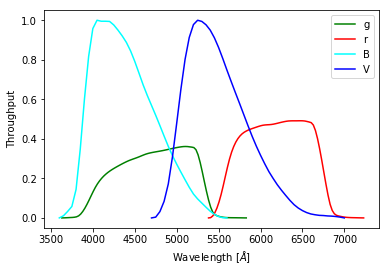

In [50]:
colors = {"B": "cyan", "V": "blue", "g": "green", "r": "red"}
for f, data in bandpass.items():
    plt.plot(data["WAVELENGTH"], data["THROUGHPUT"], color=colors[f], label=f)

plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Throughput")
plt.legend();

Note that the Johnson B, V filters are normalized to a max transmission of while the SDSS g, r filters are likely in some absolute transmission.

This doesn't matter for what we're doing below.

In [45]:
from scipy.interpolate import interp1d
flux_density_wavelength_interp = interp1d(wavelength, flux_density_wavelength)
mag_ext_interp = interp1d(wavelength, mag_ext)

source = {}
extincted_source = {}
for f, data in bandpass.items():
    source[f] = flux_density_wavelength_interp(bandpass[f]["WAVELENGTH"]) * bandpass[f]["THROUGHPUT"]
    extincted_source[f] = 10 ** (-0.4 * mag_ext_interp(bandpass[f]["WAVELENGTH"])) * source[f]

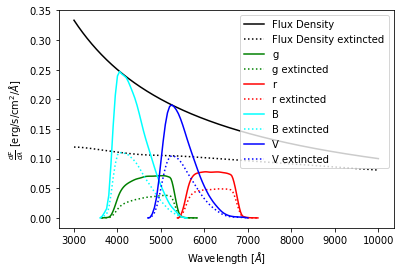

In [60]:
ax1 = plt.gca()
ax1.plot(wavelength, flux_density_wavelength, color="black", label="Flux Density")
ax1.plot(wavelength, extincted_flux_density_wavelength, color="black", ls=":", label="Flux Density extincted")

for f, data in bandpass.items():
    ax1.plot(data["WAVELENGTH"], source[f], color=colors[f], label=f)
    ax1.plot(data["WAVELENGTH"], extincted_source[f], ls=":", color=colors[f], label=f"{f} extincted")

ax1.set_xlabel("Wavelength [$\AA$]")
ax1.set_ylabel("Throughput")

ax1.set_ylabel(r"$\frac{dF}{d\lambda}$ [erg/s/cm$^2$/$\AA$]");

ax1.legend()

In [66]:
from scipy.integrate import trapz

base_flux = {}
extincted_flux = {}

for f, data in bandpass.items():
    base_flux[f] = trapz(bandpass[f]["WAVELENGTH"], source[f])
    extincted_flux[f] = trapz(bandpass[f]["WAVELENGTH"], extincted_source[f])

In [72]:
base_color = {}
extincted_color = {}
base_color['B-V'] = -2.5 * np.log10(base_flux['B'] / base_flux['V'])
base_color['g-r'] = -2.5 * np.log10(base_flux['g'] / base_flux['r'])
extincted_color['B-V'] = -2.5 * np.log10(extincted_flux['B'] / extincted_flux['V'])
extincted_color['g-r'] = -2.5 * np.log10(extincted_flux['g'] / extincted_flux['r'])

In [73]:
excess_color = {}

excess_color['B-V'] = extincted_color['B-V'] - base_color['B-V']
excess_color['g-r'] = extincted_color['g-r'] - base_color['g-r']

In [74]:
excess_color

{'B-V': 0.20078651730637842, 'g-r': 0.2352584800391574}

Great, that's reassuring.  We asked for extinction for $E(B-V)$ = 0.2, and that's the excess color we got.

The $g-r$ color is similar, but slightly different.

So we can now calculate a ratio between g-r color and A_V for our constant flux density source

In [77]:
r_gr = av / excess_color['g-r']

So if we wanted to estimate some equivalent $A_V$ based on $E(g-r)$ we have

$A_V = R_V E(B-V) = R_gr E(g-r)$

In [82]:
print(f"If R_V = {rv} then R_gr = {r_gr:.03f}")

If R_V = 3.1 then R_gr = 2.635
